In [ ]:
#import necessary libraries
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import glob
import sys
import os
print(os.getcwd())

/content


In [ ]:
pip install sigpy

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
cd gdrive/My\ Drive/Graduation/Modules/

/content/gdrive/My Drive/Graduation/Modules


In [ ]:
import sys
from data_generator import DataGenerator
from utils import sum_of_squares

In [ ]:
cd ../Data/part1/
print(os.getcwd())

In [ ]:
#read the raw-data 
data = glob.glob("/content/gdrive/My Drive/Graduation/Data/part1/*.npy")
print("Train:",len(data))

Train: 12


Data format is x-ky-kz-channel
data shape: (170, 256, 256, 2)
sample_kspace shape: (256, 256, 1)
Channel-wise k-space


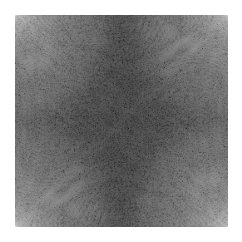

Channel-wise images


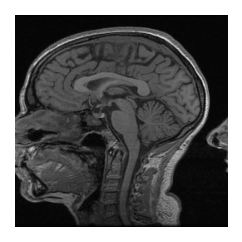

In [ ]:
#selecting spesific data for plotting
file_index = 3
slice_index = 85

sample_kspace = np.load(data[file_index])

sr = 1 # Sampling-rate in the slice-encode direction
Nz = sample_kspace.shape[2] 
Nz_sampled = int(np.ceil(Nz*sr))
sample_kspace[:,:,Nz_sampled:,:] = 0

print("Data format is x-ky-kz-channel")
print("data shape:",sample_kspace.shape)

# We just want to show one slice
sample_kspace = sample_kspace[slice_index]
# Converting to complex
sample_kspace = sample_kspace[:,:,::2] + 1j*sample_kspace[:,:,1::2]

print("sample_kspace shape:",sample_kspace.shape)

# Displaying channels' k-spaces
print("Channel-wise k-space") 
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

for i in range(1):
    plt.subplot(gs1[i])
    plt.imshow(np.log(1+np.abs(sample_kspace[:,:,i])),cmap = "gray")
    plt.axis("off")
plt.show()

#implementing inverse fourier transform to k-space
sample_rec_train = np.fft.ifft2(sample_kspace,axes = (0,1))

print("Channel-wise images") 
# Displaying channels' images
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

for i in range(1):
    plt.subplot(gs1[i])
    plt.imshow(np.abs(sample_rec_train[:,:,i]),cmap = "gray")
    plt.axis("off")
plt.show()



In [ ]:
#creating sampling mask
#input image size and acceleration rate
poissonSampling = mr.poisson(img_shape=(256,256), accel=2)

#convert the mask elements from complex to numpy.bool_
samplingMask = np.empty((256,256), dtype=np.bool_)

for i in range(len(poissonSampling)):
  for j in range(len(poissonSampling[i])):
    if (poissonSampling[i][j] == 0j):
      samplingMask[i][j]=False
    else:
      samplingMask[i][j]=True


In [ ]:
radialSampling = mr.radial(coord_shape=[2, 2, 2], img_shape=(256,256))

print(radialSampling.shape)

#convert the mask elements from complex to numpy.bool_
samplingMask = np.empty((256,256), dtype=np.bool_)

for i in range(len(radialSampling)):
  for j in range(len(radialSampling[i])):
    if (radialSampling[i][j] == 0j):
      radialSampling[i][j]=False
    else:
      radialSampling[i][j]=True


(2, 2, 2)


ValueError: ignored

Average sampling rate: 0.50732421875
sampling mask shape: (256, 256)


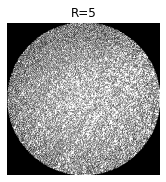

In [ ]:
print("Average sampling rate:",samplingMask[:,:Nz_sampled].sum()/samplingMask[:,:Nz_sampled].size)
print("sampling mask shape:",samplingMask.shape)

plt.figure()
plt.subplot(121)
plt.imshow(samplingMask,cmap ="gray")
plt.axis("off")
plt.title("R=5")
plt.show()

Single Channel-wise k-space


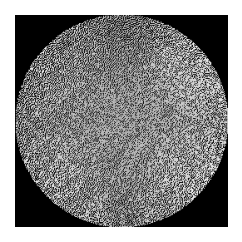

Channel-wise images


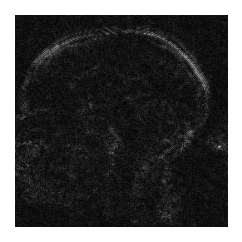

In [ ]:
sample_kspace_r5 = sample_kspace.copy()
sample_kspace_r5[~samplingMask,:] = 0 # retrospective undersampling to R = 5

# Displaying channels' k-spaces
print("Single Channel-wise k-space")    

plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

for i in range(1):
    plt.subplot(gs1[i])
    plt.imshow(np.log(1+np.abs(sample_kspace_r5[:,:,i])),cmap = "gray")
    plt.axis("off")
plt.show()

# Displaying channels' images
print("Channel-wise images")    
sample_rec_train_r5 = np.fft.ifft2(sample_kspace_r5,axes = (0,1))

plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

for i in range(1):
    plt.subplot(gs1[i])
    plt.imshow(np.abs(sample_rec_train_r5[:,:,i]),cmap = "gray")
    plt.axis("off")
plt.show()


In [ ]:
sp_r5 = np.load("../../Data/poisson_sampling/R5_218x170.npy")

print("We provide 100 sampling patterns for R=5 and R=10")
print(sp_r5.shape)
print("Average sampling rate:",sp_r5[:,:,:Nz_sampled].sum()/sp_r5[:,:,:Nz_sampled].size)
print(type(sp_r5[0][0][0]))
print(type(sp_r5[0][150][150]))
print(sp_r5[0][150][150])

plt.figure()
plt.subplot(111)
plt.imshow(sp_r5[1],cmap ="gray")
plt.axis("off")
plt.title("R=5")
plt.show()

FileNotFoundError: ignored